### High Dimensional Data (Applications in Genomics)

### Approaches with High dimensional data
- Principal component analysis (PCA) projection that spans the data as much as possible.
- Multidimensional scaling (MDS) projection that retains original distances as mus as possible
- Stochastic neighbor embedding (SNE) that keeps close by points close.


### Principal Component Analysis

The goal of **Principal Component Analysis (PCA)** is dimensionality reduction and

to find a low-dimensional projection with the largest spread.

We start with centered data $X \in \mathbb{R}^{n \times p}$.
- Principal components (PCs) lie in the direction of largest variance.
- PCs are perpendicular to other PCs, and each PC captures the largest remaining variance.

**Spectral Decomposition**
- The covariance matrix $R = \frac{1}{n} X^T X$ is symmetric and positive semidefinite.
- Each symmetric matrix $R$ can be decomposed as $R = V \Sigma V^T$.
- The columns of $V$ (eigenvectors of $R$) are the principal components.
- The diagonal entries of $\Sigma$ (eigenvalues of $R$) are the variances.

Covariance vs. Correlation
- Covariance will find the variable with the largest spread as the first principal component.
- Correlation is used when different units are compared.

Distance and Dissimilarity
- $D \in \mathbb{R}^{n \times n}$ is a distance matrix if $D_{ij} = D_{ji}$ and  $D_{ij} \leq D_{ik} + D_{jk}$ (triangle inequality).
- $D \in \mathbb{R}^{n \times n}$ is a dissimilarity matrix if $D_{ij} = D_{ji}$.


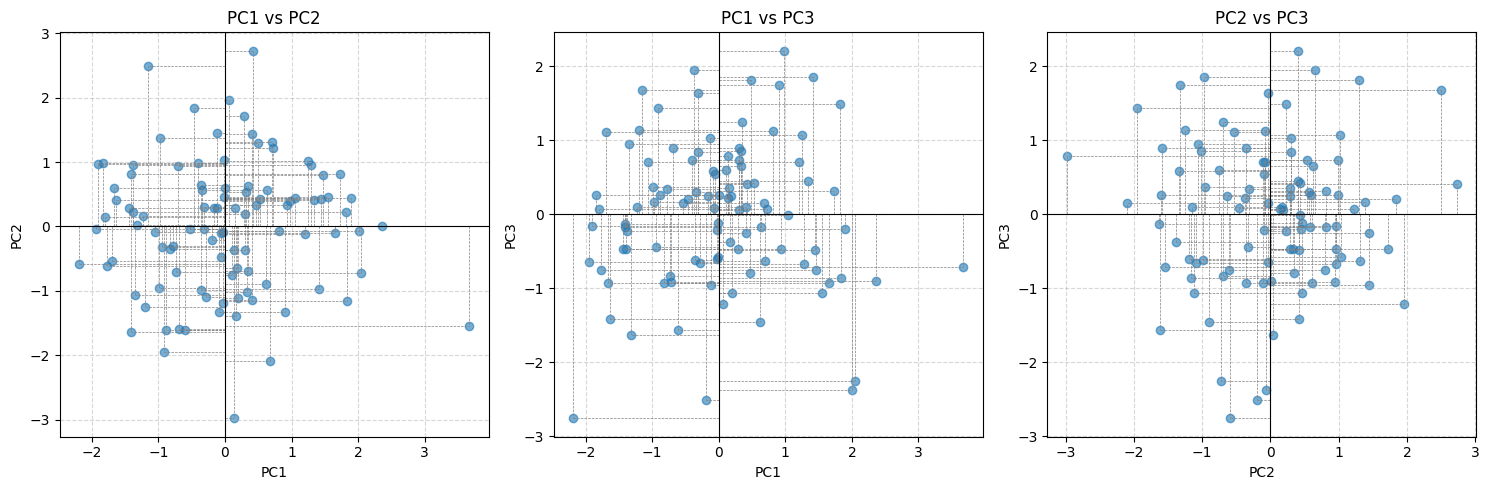

In [ ]:
''' Visualizes PCA projections onto planes formed by pairs of principal components, showing orthogonal distances '''

### Multidimensional Scaling (MDS)
Given a matrix $D \in \mathbb{R}^{n \times n}$, we aim to determine points $y_1, \dots, y_n \in \mathbb{R}^d$ for $d=2, 3$ such that:

**Classical MDS:** Minimize the objective function:
$\sum_{i=1}^{n} \sum_{j=1}^{n} \left( D_{ij} - \|y_i - y_j\|_2 \right)^2$ $D$ Euclidean

**Weighted MDS**: Minimize the objective function:
$\sum_{i=1}^{n} \sum_{j=1}^{n} w_{ij} \left( D_{ij} - \|y_i - y_j\|_2 \right)^2$

$D$ distance matrix, and $w_{ij}$ are non-negative weights. This problem is typically solved iteratively.

**Non-metric MDS**: Minimize the objective function:
$\sum_{i=1}^{n} \sum_{j=1}^{n} \left( \theta(D_{ij}) - \|y_i - y_j\|_2 \right)^2$

where $D$ is a dissimilarity matrix. The optimization is performed over the function $\theta$, and the goal is
  
to find a low-dimensional embedding or ranking of the data points.

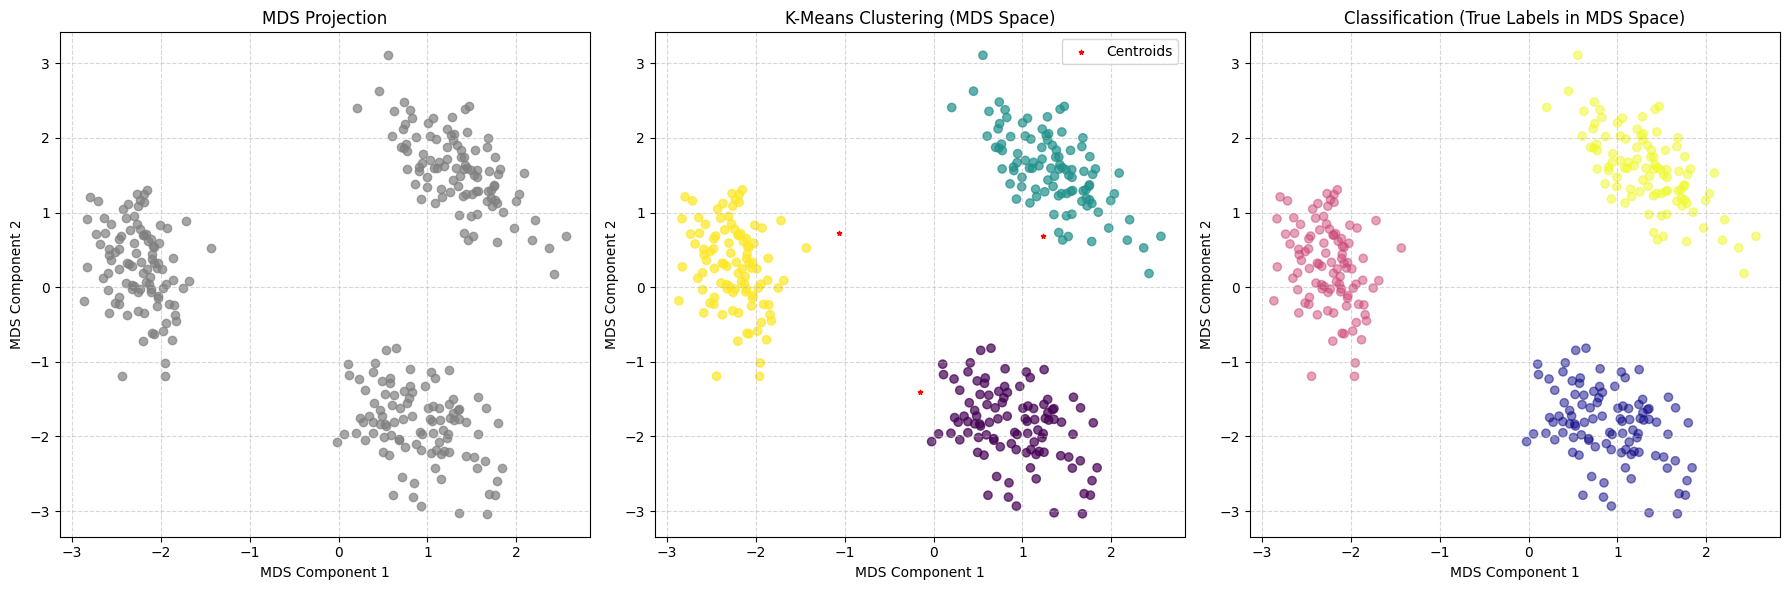

In [ ]:
''' Visualizes MDS, clustering (K-Means), and classification (using true labels) in subplots '''

### Classical MDS

- **Convert distance matrix** $D$, where $D_{ij} = ||x_i - x_j||$, into a positive semi-definite $XX^T$ $XX^T = -\frac{1}{2} (I - \frac{1}{n}ee^T) D^2 (I - \frac{1}{n}ee^T)$
 $e$ is a vector of ones, and $n$ is the number of data points

- **Optimization Problem**: The core idea is to find a configuration of points $y_i$ in a lower-dimensional space that best preserves the pairwise distances.  $\min_y \sum_{i=1}^n \sum_{j=1}^n (D_{ij}^2 - ||y_i - y_j||_2^2)^2 \approx \min_y \text{trace}(XX^T - YY^T)^2$, $Y$ is the matrix formed by the vectors $y_i$.

- **Eigenvalue Decomposition**: $XX^T = V \Sigma V^T$
where columns of $V$ are the eigenvectors of $XX^T$, and $\Sigma$ is a diagonal matrix containing the eigenvalues of $XX^T$.

- **Rank-$d$ Approximation**: To obtain the best rank-$d$ approximation of $XX^T$, we select
  the $d$ largest eigenvalues and their corresponding eigenvectors. This yields: $YY^T = V_d \Sigma_d V_d^T$ where $V_d$ consists of the $d$ eigenvectors corresponding to the largest eigenvalues, and $\Sigma_d$ is a diagonal matrix containing these $d$ largest eigenvalues.

- **Relationship to PCA:**

  Classical MDS can be viewed as Principal Component Analysis (PCA) applied to the matrix $B = XX^T$. In essence, classical MDS performs PCA on the centered squared distance matrix. Classical PCA operates on the covariance matrix $XX^T$, whereas classical MDS operates on a centered and squared distance matrix.

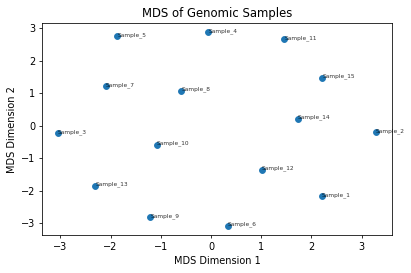

In [ ]:
''' Classical Multidimensional Scaling (MDS) on a genomic distance matrix '''

### Stochastic Neighbor Embedding (SNE)

Probabilistic approach to place objects from high-dimensional space into
low-dimensional space as to preserve the identity of neighbors
- Center a Gaussian on each object in high dimensional space
- Determine embedding such that resulting high-dimensional distribution is
approximated well by resulting low-dimensional distribution
- Determine low-dimensional distribution by minimizing Kullback-Leibler divergence
- Allows objects to be clustered without forcing outdoor concepts

In essence, SNE focuses on preserving local structures, making it particularly useful for visualizing complex, high-dimensional datasets where preserving the relationships between neighboring points is crucial.


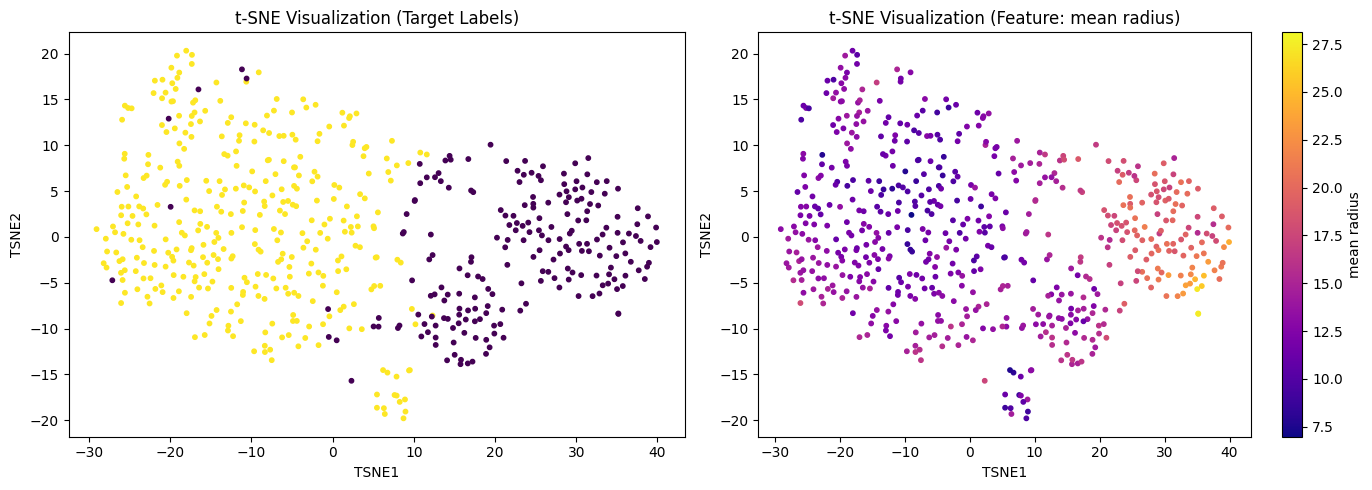

In [ ]:
''' Stochastic neighbor embedding (SNE) with genomic data '''

### Symmetric SNE
- Given a dissimilarity matrix $D$, for each object $i$, compute the probability of picking $j$

  as a neighbor: $p_{ij} = \exp(-D_{ij}^2)$
    
- In the low-dimensional space, for each point $y_i$, compute the probability of picking $y_j$

  as a neighbor: $q_{ij} = \frac{\exp(-\|y_i - y_j\|_2^2)}{\sum_{k \neq l} \exp(-\|y_k - y_l\|_2^2)}$
    
- Minimize the Kullback-Leibler divergence: ${KL}(P||Q) = \sum_{i,j} p_{ij} \log\left(\frac{p_{ij}}{q_{ij}}\right)$
    
- By modeling $p_{ij}$ by $q_{ij} = p_{ij} + x$, we can choose $q_{ij} = p_{ij} - x$.
    
  We keep nearby objects close and separated objects relatively far.


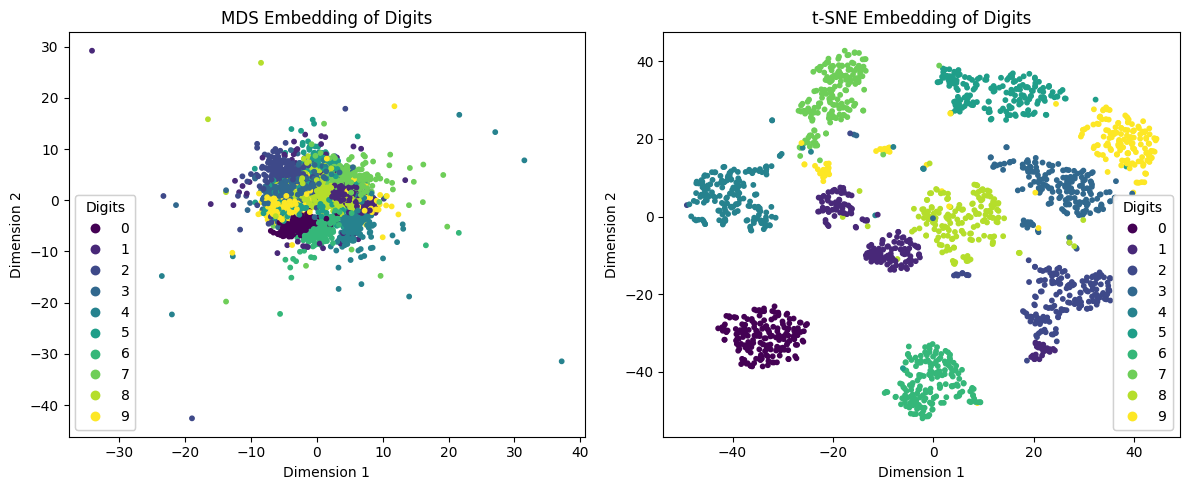

In [ ]:
''' MDS embedding + t-SNE embedding for Digit recognition '''

### Clustering

### k-means clustering
- Clusters are obtained by minimizing some loss function.
- Natural loss function given by within-groups sum of squares (WGSS):

  $W(C) = \sum_{k=1}^{K} \sum_{x_i \in C_k} \sum_{x_j \in C_k} d(x^{(i)}, x^{(j)})^2$
    
- $W(C)$ characterizes the extent to which observations assigned to the same cluster tend to be close to one another

- K-means clustering $d(x^{(i)}, x^{(j)})^2 = ||x^{(i)} - x^{(j)}||_2^2$

- Then WGSS becomes $W(C) = \sum_{k=1}^{K} (2N_k) \sum_{x_i \in C_k} ||x_i - \mu_k||_2^2$
    
    where $N_k$ is the number of elements in cluster $C_k$, and $\mu_k$ is the mean of cluster $C_k$.
- Exact solution computationally not feasible, using greedy algorithm or random restarts.


### Gaussian mixture model
- Assume underlying statistical model:

  $P(x) = \sum_k P(\text{cluster } k) P(x|{cluster } k),$
where $X|\text{cluster } k \sim {N}(\mu_k, \Sigma_k)$.

- Sample $x$ is assigned to cluster $k$ that maximizes $P(\text{cluster } k | x $.

  Estimating $P(\text{cluster } k)$, $\mu_k$, and $\Sigma_k$ by maximum likelihood estimation is difficult,
  
  leading to a non-convex optimization problem.

- Parameter estimates are found using the EM algorithm.

- The number of clusters is found by maximizing the Bayesian information criterion:
${BIC} = \log({likelihood}) - \frac{\log(n)}{2} \times ({number of parameters}),$where $n$ is the sample size.

### Hierarchical clustering
- Agglomerative clustering building up from indovidual observations
- Divisive clustering starting with the whole group of observations and splitting off clusters